In [1]:
import xarray as xr
import intake,yaml,os
import intake_esm
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# result of build_xshield_cat.ipynb
col_url = "/home/tmerlis/hackathon/catbuild/xshield_cat.json"

In [3]:
col = intake.open_esm_datastore(col_url)

In [4]:
col.df

,source_id,experiment_id,frequency,realm,table_id,member_id,grid_label,variable_id,time_range,chunk_freq,platform,path
0,GLOBALFV3,20191020.00Z.C384.L79x2_pire_CO2_1270ppmv,NaN,NaN,NaN,processed,NaN,v500_C384_1440x720,2020011300,NaN,stellar_run,/scratch/cimes/tmerlis/GLOBALFV3/stellar_run/p...
1,GLOBALFV3,20191020.00Z.C384.L79x2_pire_CO2_1270ppmv,NaN,NaN,NaN,processed,NaN,u_dt_phys_C384_1440x720,2020011300,NaN,stellar_run,/scratch/cimes/tmerlis/GLOBALFV3/stellar_run/p...
2,GLOBALFV3,20191020.00Z.C384.L79x2_pire_CO2_1270ppmv,NaN,NaN,NaN,processed,NaN,u_dt_sg_C384_1440x720,2020011300,NaN,stellar_run,/scratch/cimes/tmerlis/GLOBALFV3/stellar_run/p...
3,GLOBALFV3,20191020.00Z.C384.L79x2_pire_CO2_1270ppmv,NaN,NaN,NaN,processed,NaN,int_tendency_of_air_temperature_due_to_deep_co...,2020011300,NaN,stellar_run,/scratch/cimes/tmerlis/GLOBALFV3/stellar_run/p...
4,GLOBALFV3,20191020.00Z.C384.L79x2_pire_CO2_1270ppmv,NaN,NaN,NaN,processed,NaN,int_tendency_of_air_temperature_due_to_longwav...,2020011300,NaN,stellar_run,/scratch/cimes/tmerlis/GLOBALFV3/stellar_run/p...
...,...,...,...,...,...,...,...,...,...,...,...,...
299513,GLOBALFV3,20191020.00Z.C3072.L79x2_pire,NaN,NaN,NaN,processed_new,NaN,int_u_dt_phys_coarse_C3072_1440x720,2021081700,NaN,stellar_run,/scratch/cimes/tmerlis/GLOBALFV3/stellar_run/p...
299514,GLOBALFV3,20191020.00Z.C3072.L79x2_pire,NaN,NaN,NaN,processed_new,NaN,omT_coarse_C3072_1440x720,2021081700,NaN,stellar_run,/scratch/cimes/tmerlis/GLOBALFV3/stellar_run/p...
299515,GLOBALFV3,20191020.00Z.C3072.L79x2_pire,NaN,NaN,NaN,processed_new,NaN,int_tendency_of_air_temperature_due_to_shortwa...,2021081700,NaN,stellar_run,/scratch/cimes/tmerlis/GLOBALFV3/stellar_run/p...
299516,GLOBALFV3,20191020.00Z.C3072.L79x2_pire,NaN,NaN,NaN,processed_new,NaN,int_tendency_of_specific_humidity_due_to_turbu...,2021081700,NaN,stellar_run,/scratch/cimes/tmerlis/GLOBALFV3/stellar_run/p...


In [5]:
# note member_id is used for the different simulation years that are in the 'processed' and 'processed_new' directories
#cat = col.search(variable_id = 't925_coarse_C3072_1440x720', experiment_id = '20191020.00Z.C3072.L79x2_pire_PLUS_4K_CO2_1270ppmv', member_id = 'processed')
cat = col.search(variable_id = 't925_coarse_C3072_1440x720', experiment_id = '20191020.00Z.C3072.L79x2_pire_PLUS_4K_CO2_1270ppmv')

In [6]:
cat

,unique
source_id,1
experiment_id,1
frequency,0
realm,0
table_id,0
member_id,2
grid_label,0
variable_id,1
time_range,477
chunk_freq,0


In [7]:
cat.df['path'][0]

'/scratch/cimes/tmerlis/GLOBALFV3/stellar_run/processed/20191020.00Z.C3072.L79x2_pire_PLUS_4K_CO2_1270ppmv/pp/2020071400/t925_coarse_C3072_1440x720.fre.nc'

In [8]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time':5}, 'decode_times': True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'source_id.experiment_id.member_id'


In [9]:
for k in dset_dict.keys(): 
    print(k)

GLOBALFV3.20191020.00Z.C3072.L79x2_pire_PLUS_4K_CO2_1270ppmv.processed_new
GLOBALFV3.20191020.00Z.C3072.L79x2_pire_PLUS_4K_CO2_1270ppmv.processed


In [10]:
# year 1 in ds, year 2 in ds2
ds = dset_dict['GLOBALFV3.20191020.00Z.C3072.L79x2_pire_PLUS_4K_CO2_1270ppmv.processed']
ds2 = dset_dict['GLOBALFV3.20191020.00Z.C3072.L79x2_pire_PLUS_4K_CO2_1270ppmv.processed_new']

In [11]:
ds

<xarray.Dataset> Size: 15GB
Dimensions:              (time: 3640, grid_yt_coarse: 720, bnds: 2,
                          grid_xt_coarse: 1440)
Coordinates:
  * time                 (time) object 29kB 2019-10-20 03:00:00 ... 2021-01-1...
  * grid_yt_coarse       (grid_yt_coarse) float32 3kB -89.88 -89.62 ... 89.88
    grid_yt_coarse_bnds  (grid_yt_coarse, bnds) float32 6kB dask.array<chunksize=(720, 2), meta=np.ndarray>
  * grid_xt_coarse       (grid_xt_coarse) float32 6kB 0.125 0.375 ... 359.9
    grid_xt_coarse_bnds  (grid_xt_coarse, bnds) float32 12kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    t925_coarse          (time, grid_yt_coarse, grid_xt_coarse) float32 15GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    *empty*
Attributes: (12/13)
    title:                           PIRE_production_202103.20191020.00Z.C307...
    grid_type:                       regular
    grid_tile:                       N/A
    code_release_version:            19.1
    git_hash:                        c97c1f6afab0df3545ee82c337d51accc4205bc3
    intake_esm_vars:                 ['t925_coarse_C3072_1440x720']
    ...                              ...
    intake_esm_attrs:experiment_id:  20191020.00Z.C3072.L79x2_pire_PLUS_4K_CO...
    intake_esm_attrs:member_id:      processed
    intake_esm_attrs:variable_id:    t925_coarse_C3072_1440x720
    intake_esm_attrs:platform:       stellar_run
    intake_esm_attrs:_data_format_:  netcdf
    intake_esm_dataset_key:          GLOBALFV3.20191020.00Z.C3072.L79x2_pire_...

In [12]:
ds.time

<xarray.DataArray 'time' (time: 3640)> Size: 29kB
array([cftime.DatetimeJulian(2019, 10, 20, 3, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 10, 20, 6, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 10, 20, 9, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeJulian(2021, 1, 16, 18, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2021, 1, 16, 21, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2021, 1, 17, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 29kB 2019-10-20 03:00:00 ... 2021-01-17 00:00:00
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  JULIAN

In [13]:
ds.t925_coarse

<xarray.DataArray 't925_coarse' (time: 3640, grid_yt_coarse: 720,
                                 grid_xt_coarse: 1440)> Size: 15GB
dask.array<concatenate, shape=(3640, 720, 1440), dtype=float32, chunksize=(5, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time            (time) object 29kB 2019-10-20 03:00:00 ... 2021-01-17 00:...
  * grid_yt_coarse  (grid_yt_coarse) float32 3kB -89.88 -89.62 ... 89.62 89.88
  * grid_xt_coarse  (grid_xt_coarse) float32 6kB 0.125 0.375 ... 359.6 359.9
    t925_coarse     (time, grid_yt_coarse, grid_xt_coarse) float32 15GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
Attributes:
    units:          K
    long_name:      coarse-grained 925-mb temperature
    cell_methods:   time: point
    interp_method:  conserve_order1

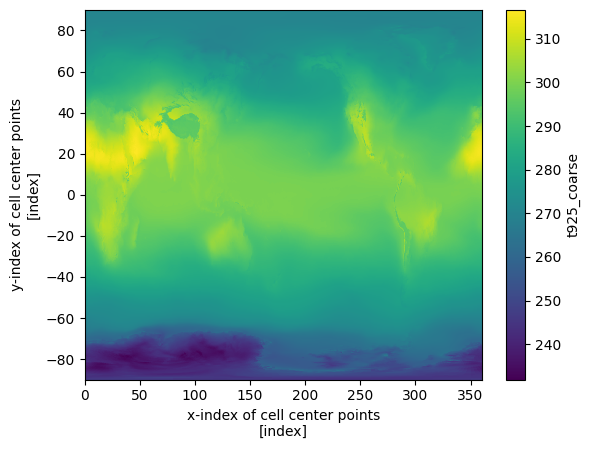

CPU times: user 1.85 s, sys: 1.16 s, total: 3.01 s
Wall time: 7.08 s


In [14]:
%%time
# monthly mean over May, where the chunking of the nc files is irregular
ds.t925_coarse.sel(time=slice('2020-05-01', '2020-05-31')).mean(dim='time').plot()
plt.show()

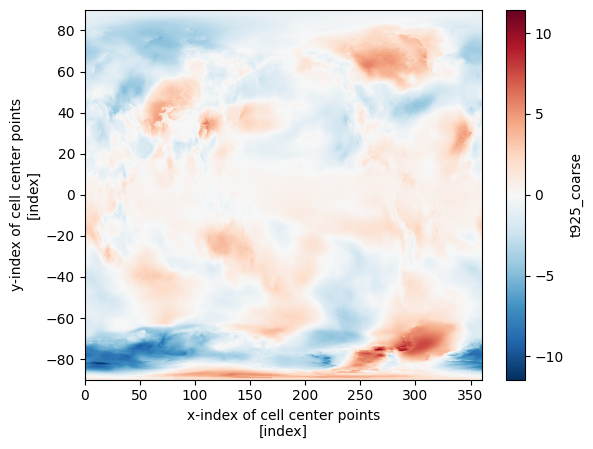

CPU times: user 3.09 s, sys: 1.06 s, total: 4.15 s
Wall time: 8.69 s


In [15]:
%%time
# difference between year 1 May and year 2 May
(ds.t925_coarse.sel(time=slice('2020-05-01', '2020-05-31')).mean(dim='time') - ds2.t925_coarse.sel(time=slice('2021-05-01', '2021-05-31')).mean(dim='time') ).plot()
plt.show()